In [9]:
import numpy as np
import ipyvolume as ipv
from compas.geometry import Point, Frame, Box, Sphere
from compas_vol.primitives import VolBox, VolSphere
from compas_vol.combinations import Union

In [55]:
box = Box(Frame(Point(2,3,1), (1,0.2,-0.3), (0,1,0.4)), 25, 20, 15)
vbox = Shell(VolBox(box, 4.0))

In [11]:
x, y, z = np.ogrid[-20:20:128j,-20:20:128j,-20:20:128j]

In [56]:
dm = vbox.get_distance_numpy(x, y, z)

In [122]:
fig = ipv.figure(width=800, height=450)
ipv.xyzlim(20)
mesh = ipv.plot_isosurface(dm, 0.0, color='white', extent=[(-20,20) for _ in range(3)])
ipv.style.use('minimal')
ipv.show()

In [18]:
from compas.geometry import Cylinder, Circle, Plane
from compas_vol.primitives import VolCylinder

In [20]:
cyl = Cylinder(Circle(Plane(Point(0,0,0), (0,0,1)), 15), 45)
vcyl = VolCylinder(cyl)

In [21]:
cdm = vcyl.get_distance_numpy(x, y, z)

In [102]:
from compas_vol.microstructures import TPMS
from compas_vol.modifications import Overlay
tpms = TPMS(tpmstype=1, wavelength = 2)
rigid_cyl = Overlay(vcyl, tpms, 0.3)

In [103]:
rcdm = rigid_cyl.get_distance_numpy(x,y,z)

In [104]:
fig = ipv.figure(width=800, height=450)
ipv.xyzlim(20)
mesh = ipv.plot_isosurface(rcdm, 0.0, color='white', extent=[(-20,20) for _ in range(3)])
ipv.style.use('minimal')
ipv.show()

In [38]:
from compas_vol.primitives import VolPlane

In [39]:
plane = VolPlane(Plane((0,0,0), (0,0,1)))

In [40]:
taper = Overlay(vcyl, plane, 0.3)

In [41]:
tdm = taper.get_distance_numpy(x,y,z)

In [123]:
def display_dm(dm):
    fig = ipv.figure(width=800, height=450)
    ipv.xyzlim(20)
    mesh = ipv.plot_isosurface(dm, 0.0, color='white', extent=[(-20,20) for _ in range(3)])
    ipv.style.use('minimal')
    ipv.show()

In [124]:
display_dm(tdm)

In [46]:
import matplotlib.pyplot as plt

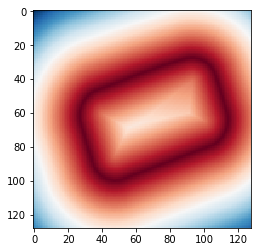

In [58]:
plt.imshow(dm[:,64,:].T, cmap='RdBu')

In [52]:
from compas_vol.modifications import Shell

In [53]:
shellplane = Overlay(vcyl, Shell(plane))
sdm = shellplane.get_distance_numpy(x,y,z)

In [125]:
display_dm(sdm)

In [59]:
from compas_vol.modifications import MultiShell

In [62]:
shellplane = Overlay(vcyl, MultiShell(plane, 2, 4), 0.5)
sdm = shellplane.get_distance_numpy(x,y,z)

In [64]:
p = Point(1,2,3)
print(p)

Point(1.000, 2.000, 3.000)


In [65]:
print(shellplane)

Overlay(VolCylinder(Cylinder(Circle(Plane(Point(0.000, 0.000, 0.000), Vector(0.000, 0.000, 1.000)), 15.0), 45.0)),MultiShell(VolPlane(Plane(Point(0.000, 0.000, 0.000), Vector(0.000, 0.000, 1.000))),2.000,4.000),0.500)


In [67]:
from compas.geometry import Vector
sp2 = eval(str(shellplane))

In [68]:
sp2dm = sp2.get_distance_numpy(x,y,z)

In [70]:
display_dm(sp2dm)

In [105]:
cyl2 = Cylinder(Circle(Plane(Point(0,0,0), (0.4,0.4,1)), 15), 100)
vcyl2 = VolCylinder(cyl2)

In [108]:
shellplane = Overlay(vcyl, MultiShell(vcyl2, 1, 3), 0.5)
sdm = shellplane.get_distance_numpy(x,y,z)

In [109]:
display_dm(sdm)

In [75]:
from compas_vol.utilities import get_random_vector_3D

In [80]:
edges = []
for i in range(7):
    normal = Vector(*get_random_vector_3D())
    plane = Plane(normal*12, normal)
    cylinder = Cylinder(Circle(plane, 3), 15)
    edges.append(VolCylinder(cylinder))

In [81]:
u = Union(edges)
dmu = u.get_distance_numpy(x,y,z)

In [82]:
display_dm(dmu)

In [83]:
s = VolSphere(Sphere((0,0,0), 7))

In [84]:
from compas_vol.combinations import SmoothUnion

In [92]:
su = SmoothUnion(u, s, r=3)

In [95]:
ssu = Shell(su)

In [96]:
dmsu = ssu.get_distance_numpy(x,y,z)

In [97]:
display_dm(dmsu)

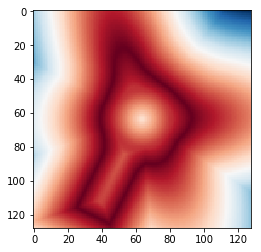

In [98]:
plt.imshow(dmsu[:,64,:], cmap='RdBu')

In [116]:
node_ribs = Overlay(su, MultiShell(s, 1, 2), 0.2)

In [117]:
nrdm = node_ribs.get_distance_numpy(x,y,z)

In [126]:
display_dm(nrdm)

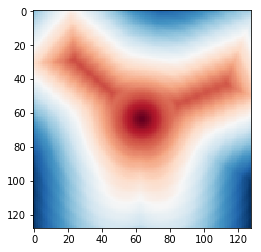

In [121]:
plt.imshow(nrdm[64,:,:], cmap='RdBu')